In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

## 1. Data Processing and Exploration

### 1.1 Data Preparation
Apply label encoding to non-numeric relevant features (Family, Genus, Species) and drop unnecessary column (Record ID)

In [263]:
# Load the dataset
filepath = "/content/Frogs_MFCCs.csv"
data = pd.read_csv(filepath)

mfcc_data = data.copy()

# Initialize a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each metadata column and add it to mfcc_data
metadata_columns = ['Family', 'Genus', 'Species']
for column in metadata_columns:
    mfcc_data[column] = label_encoder.fit_transform(data[column])

# Drop the 'RecordID' column
mfcc_data = mfcc_data.drop(columns=['RecordID'])

mfcc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

### 1.2 Exploratory Data Analysis
Analyze the dataset, and visualize feature
distributions.


In [264]:
mfcc_data.describe()  # summary statistics

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,2.520083,1.255733,2.401529
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,0.676037,1.734515,2.179178
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,0.000000,0.000000,0.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,2.000000,0.000000,1.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,3.000000,0.000000,1.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,3.000000,3.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,3.000000,7.000000,9.000000


In [265]:
mfcc_data.nunique()  # number of unique values in each column

,0
MFCCs_ 1,249
MFCCs_ 2,7140
MFCCs_ 3,7026
MFCCs_ 4,7175
MFCCs_ 5,7195
MFCCs_ 6,7195
MFCCs_ 7,7195
MFCCs_ 8,7195
MFCCs_ 9,7195
MFCCs_10,7195


#### Histograms and Pie Charts:
Show the frequency distribution of each feature. Ideal for identifying skewness and modality.

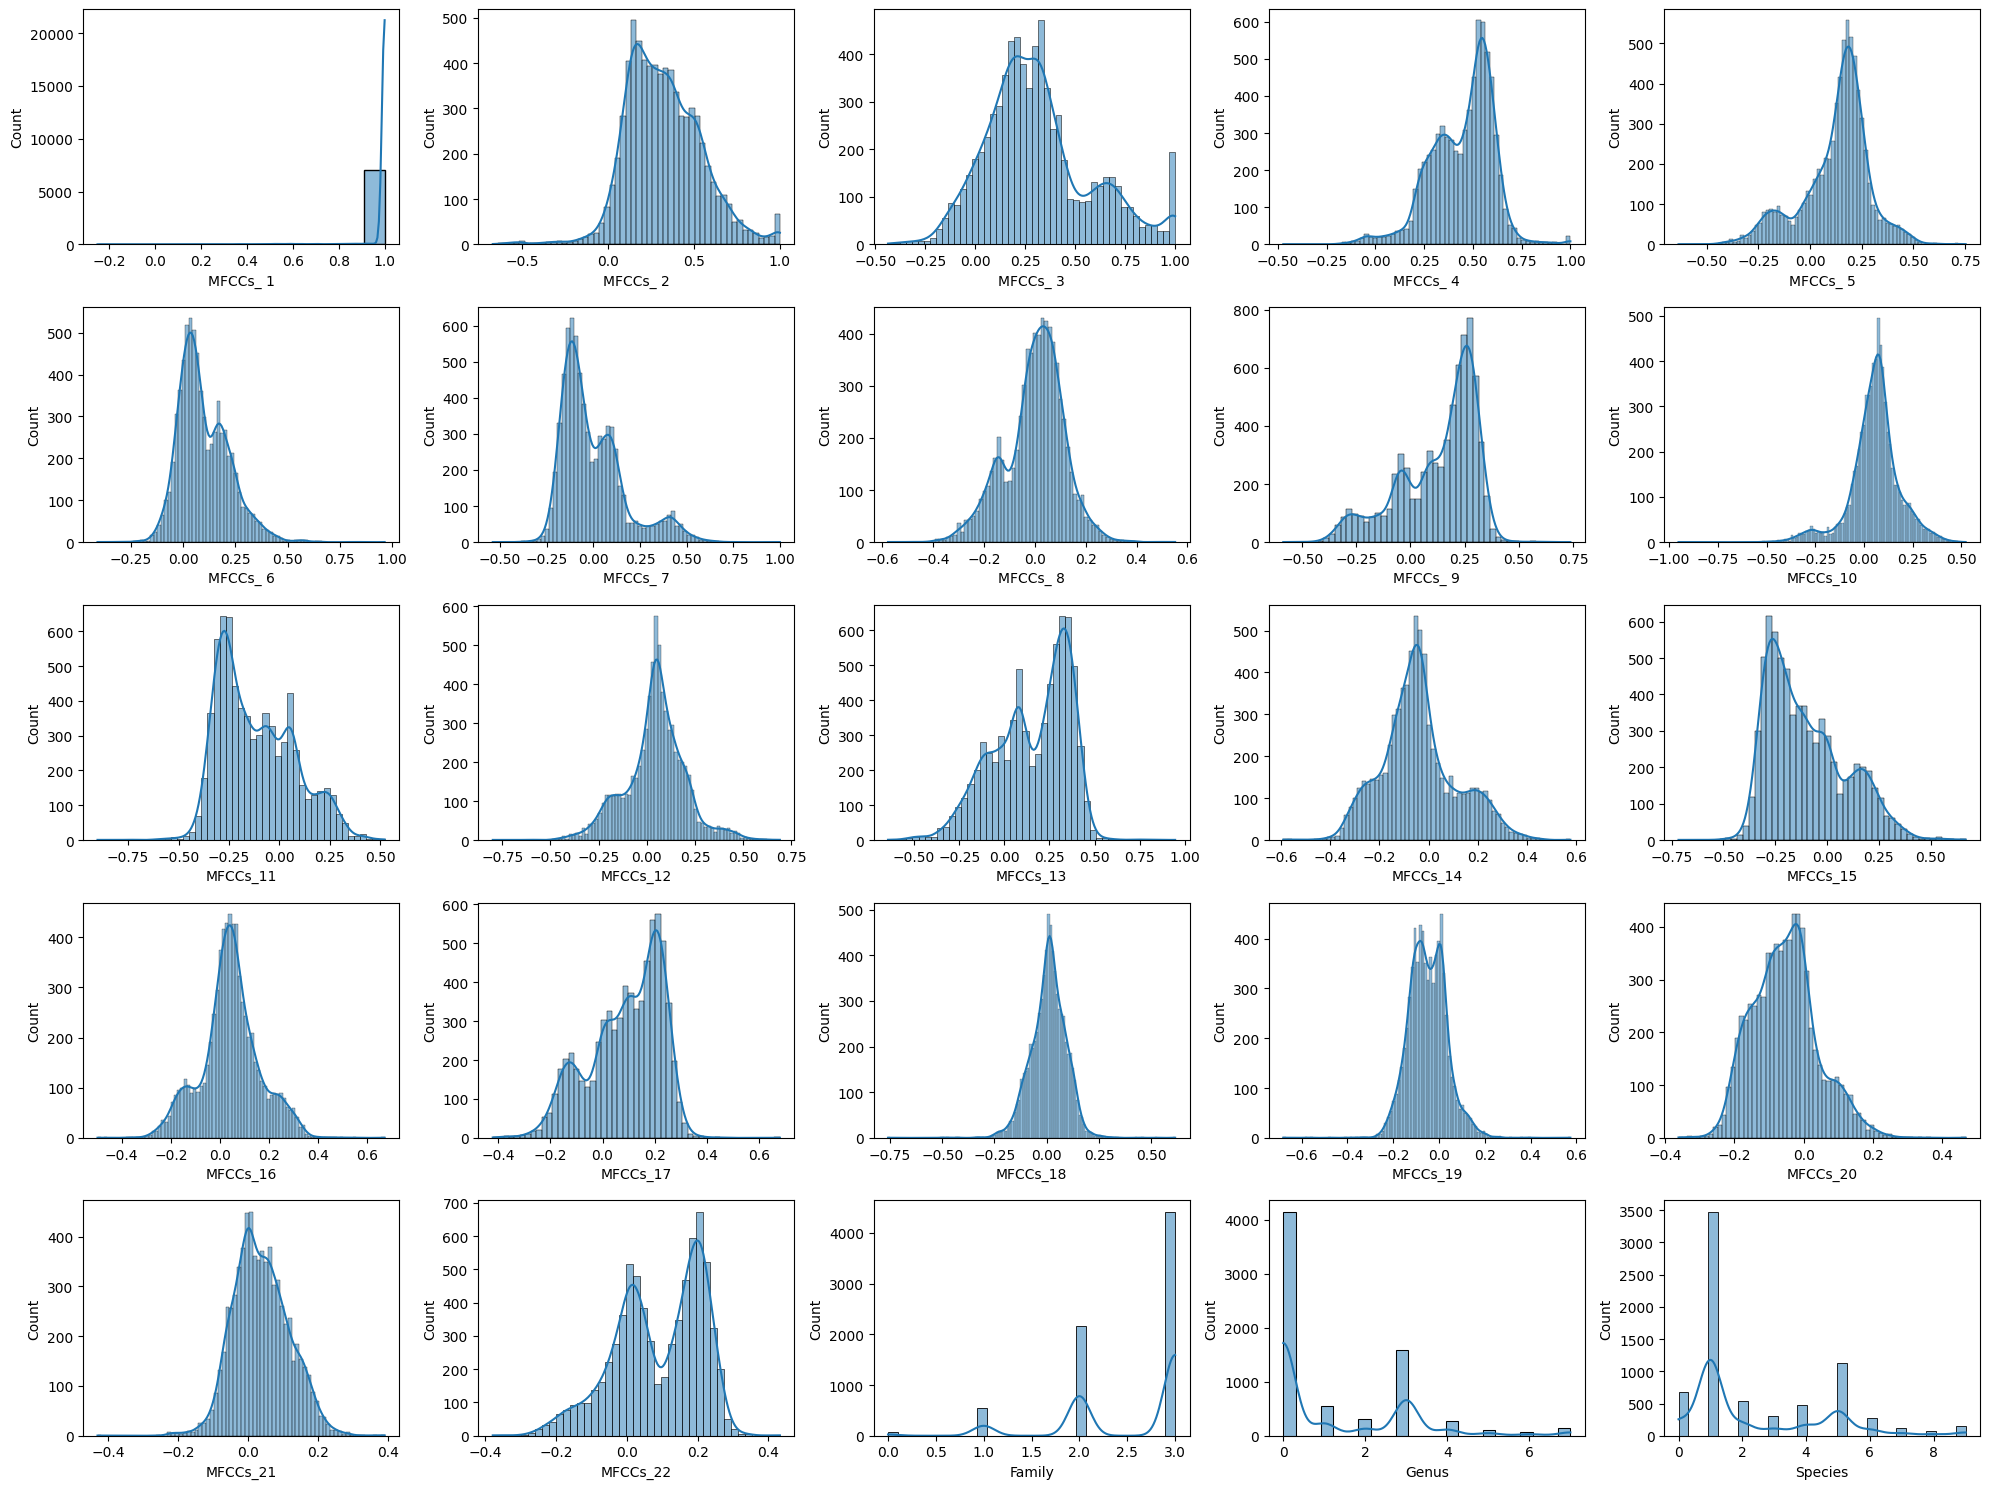

In [266]:
def beautiful_plot(df):
    plt.figure(figsize=(20, 15))
    rows, cols = (df.shape[1] + 4) // 5, 5

    for idx, column in enumerate(df.columns):
        plt.subplot(rows, cols, idx + 1)
        sns.histplot(df[column], kde=True)

    plt.tight_layout()
    plt.show()


beautiful_plot(mfcc_data)

<Axes: xlabel='Family', ylabel='count'>

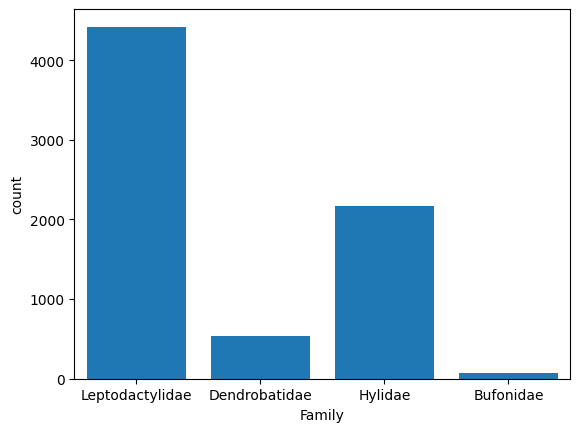

In [267]:
sns.countplot(x="Family", data=data, saturation=10)

<Axes: xlabel='Genus', ylabel='count'>

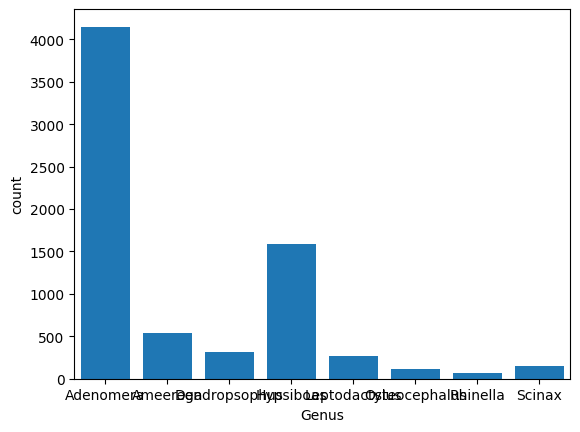

In [268]:
sns.countplot(x="Genus", data=data, saturation=10)

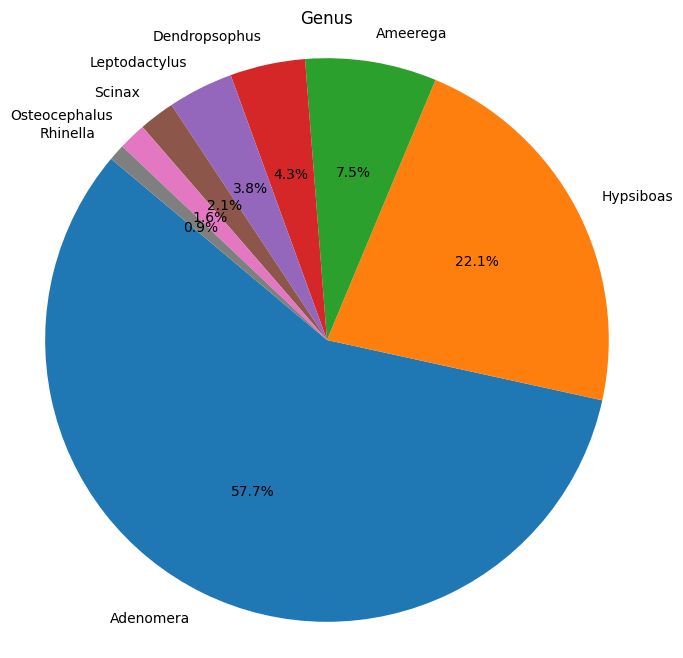

In [269]:
genus_counts = data['Genus'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genus_counts, labels=genus_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genus')
plt.axis('equal')
plt.show()

#### Box Plots
Useful for spotting outliers and understanding the spread (quartiles) of the data.

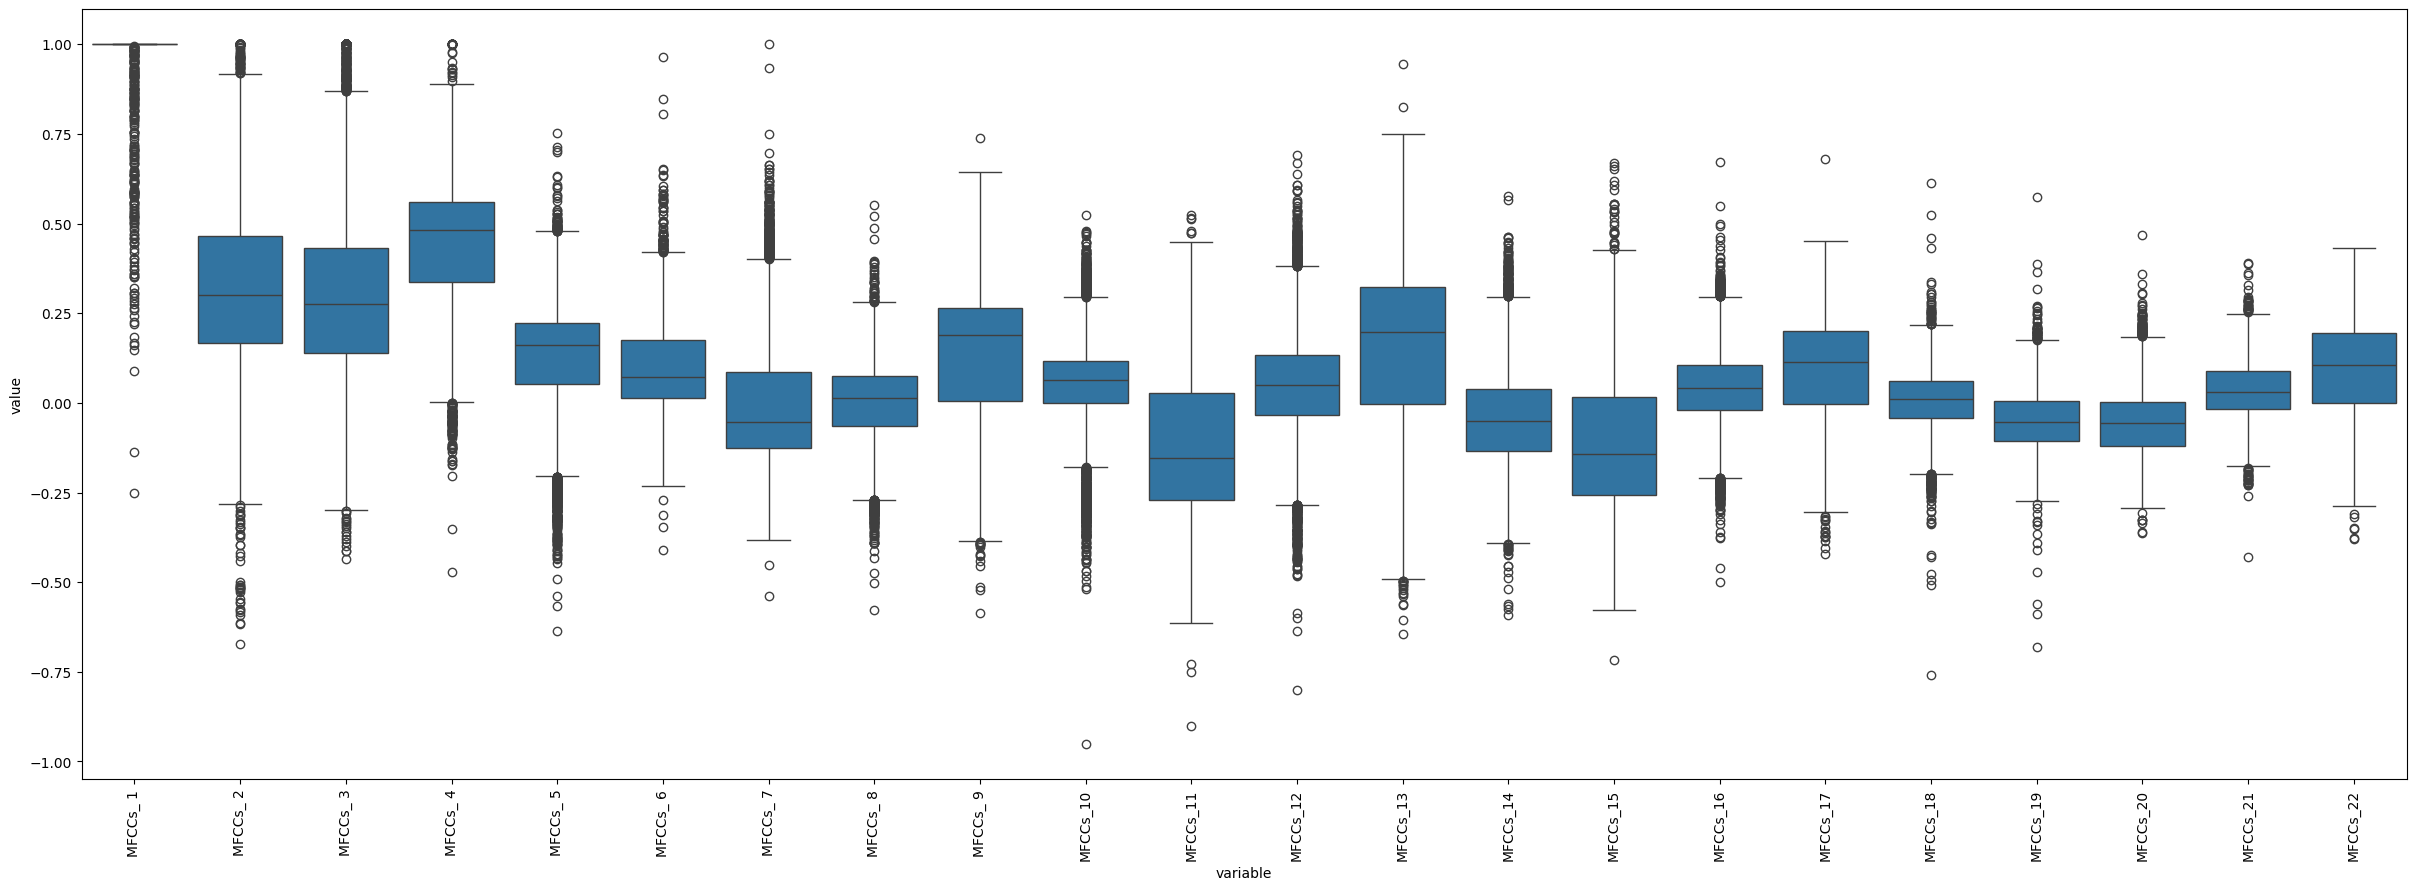

In [270]:
plt.figure(figsize=(30,10))
sns.boxplot(x="variable", y="value", data=pd.melt(mfcc_data.drop(columns=metadata_columns)))
plt.xticks(rotation=90)
plt.show()

#### Outliers
Check for missing values and outliers, as they can distort clustering results. Clean the data accordingly.

In [271]:
mfcc_data.isnull().sum()  # number of missing values in each column

,0
MFCCs_ 1,0
MFCCs_ 2,0
MFCCs_ 3,0
MFCCs_ 4,0
MFCCs_ 5,0
MFCCs_ 6,0
MFCCs_ 7,0
MFCCs_ 8,0
MFCCs_ 9,0
MFCCs_10,0


Original shape: (7195, 25)
Shape after removing outliers: (6295, 25)
Number of outliers removed: 900


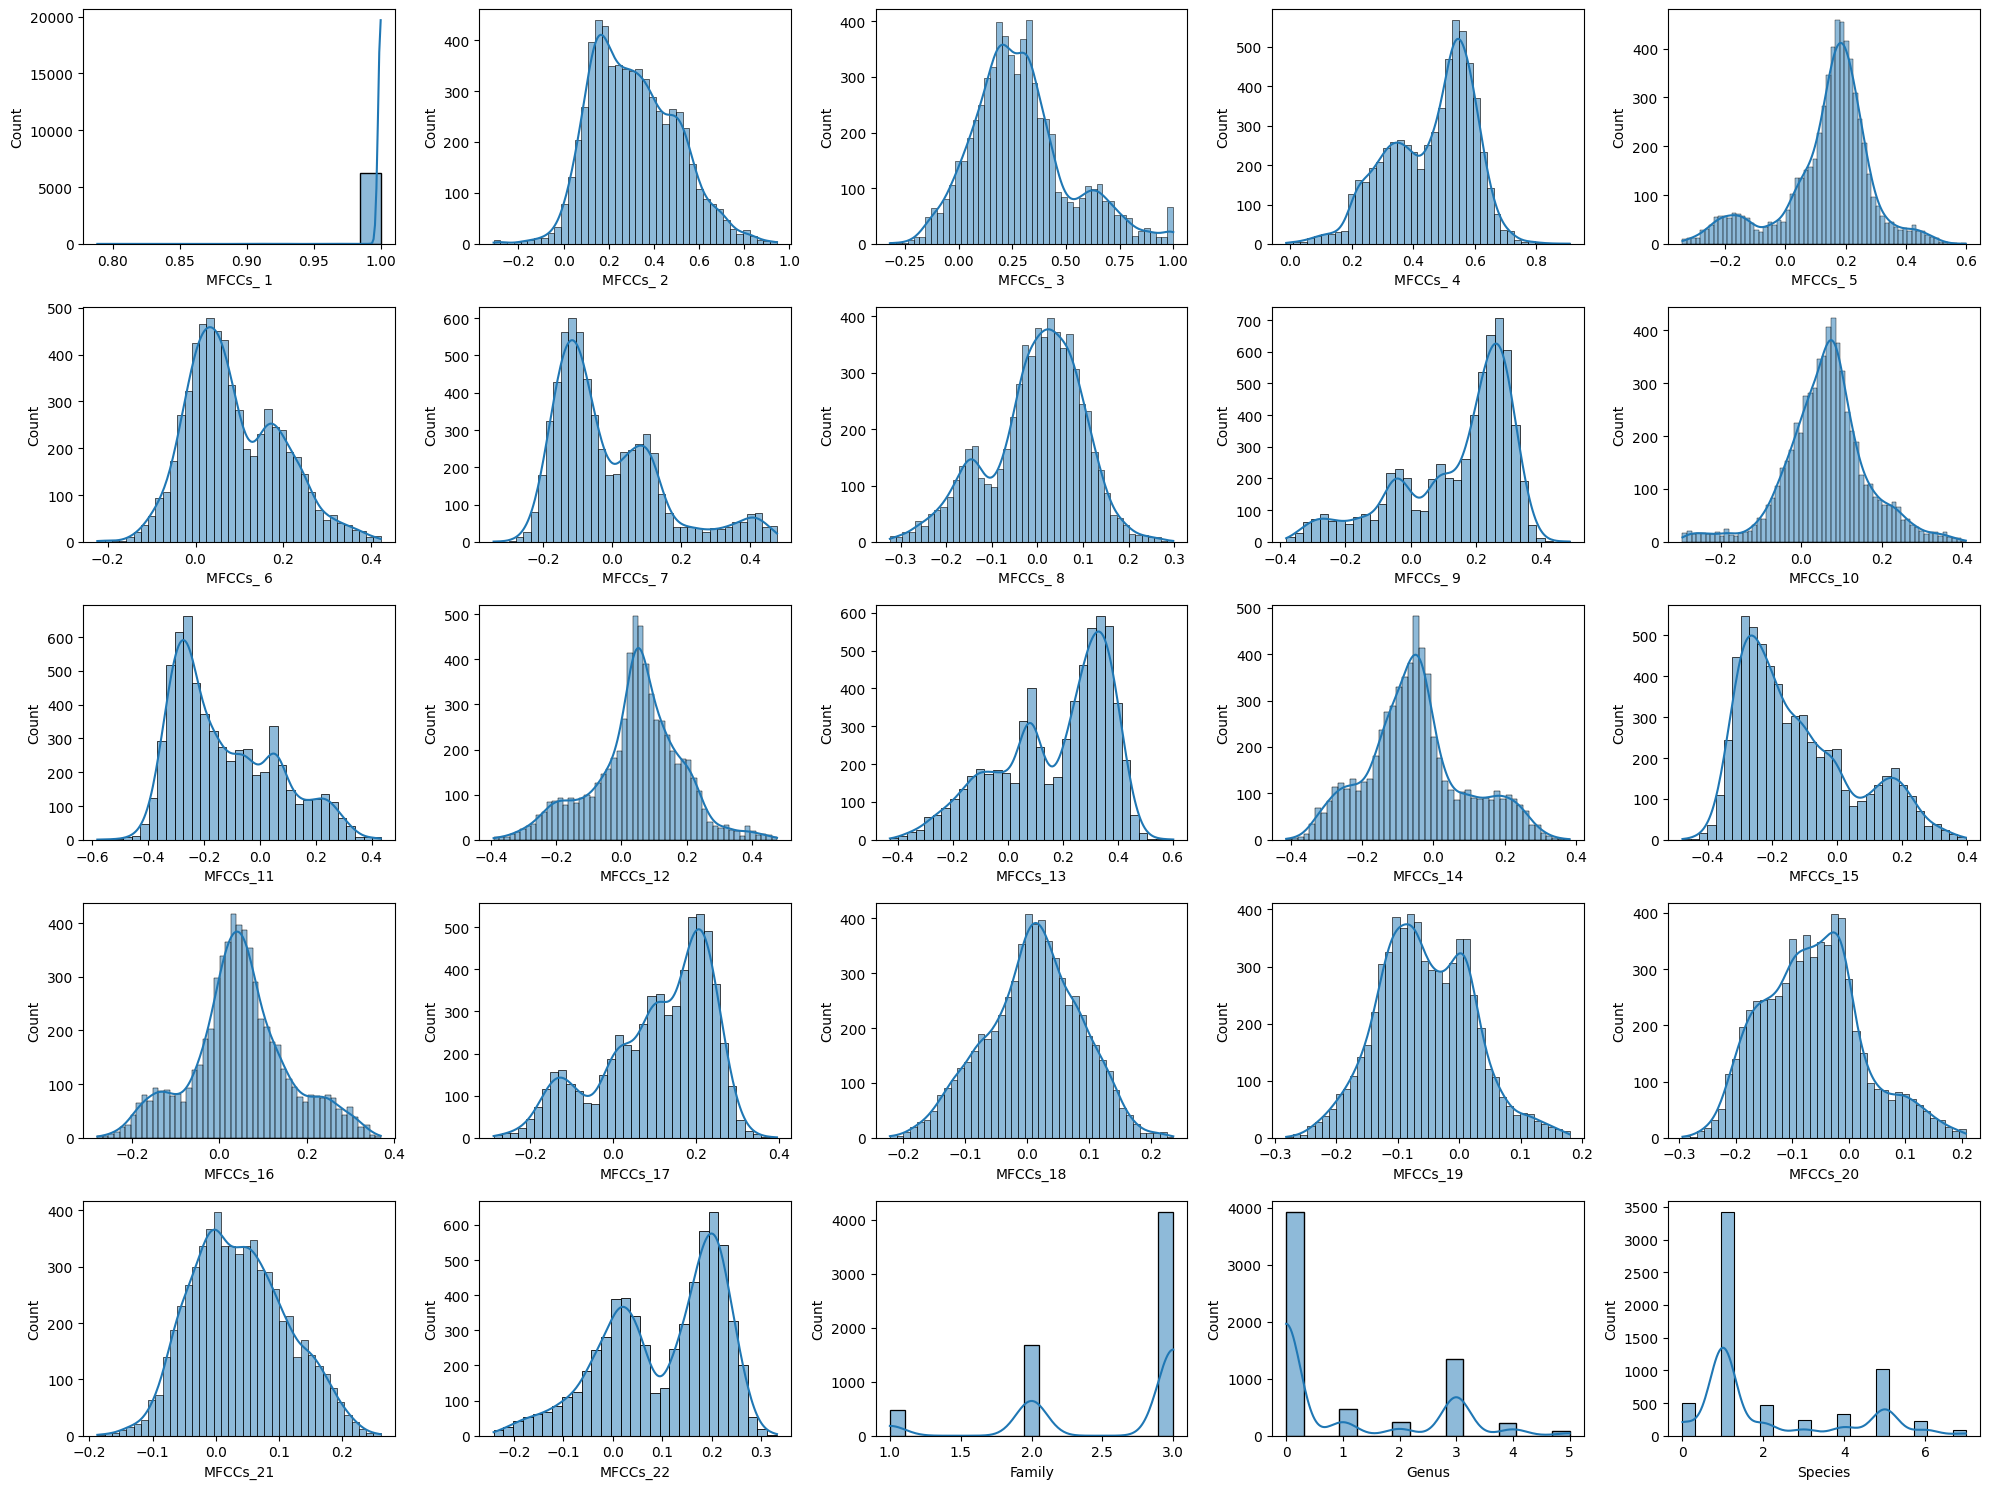

In [272]:
# For each feature, remove the outliers that are more than 3 standard deviations away from the mean
def remove_outliers(df, columns, n_std=3):
    df_clean = df.copy()
    for column in columns:
        # Calculate mean and standard deviation
        mean = df_clean[column].mean()
        std = df_clean[column].std()

        # Calculate z-scores
        z_scores = (df_clean[column] - mean) / std

        # Remove outliers based on z-score threshold
        df_clean = df_clean[abs(z_scores) <= n_std]

    return df_clean

# Remove outliers from all numeric columns
print(f"Original shape: {mfcc_data.shape}")
mfcc_data_modified = remove_outliers(mfcc_data, mfcc_data.columns)
print(f"Shape after removing outliers: {mfcc_data_modified.shape}")
print(f"Number of outliers removed: {mfcc_data.shape[0] - mfcc_data_modified.shape[0]}")
beautiful_plot(mfcc_data_modified)

### 1.3 Feature Engineering
Derive new features from the existing MFCCs to potentially improve clustering performance.

In [273]:
mfcc_poly_df = mfcc_data_modified.copy()

"""Polynomial Features"""

# Get numeric columns only, excluding categorical features
numeric_columns = mfcc_data_modified.select_dtypes(include=['float64', 'int64']).columns

# Choose feature with lowest variance
feature_variances = mfcc_data_modified[numeric_columns].var()
lowest_variance_feature = feature_variances.sort_values(ascending=True).index[0]
print("Feature chosen for polynomial transformation (lowest variance): ", lowest_variance_feature)

# Create polynomial feature
mfcc_poly_df[lowest_variance_feature + "_squared"] = mfcc_poly_df[lowest_variance_feature] ** 2
lowest_variance_feature_squared = lowest_variance_feature + "_squared"

# Compare the variances
print("Original feature variance:", mfcc_poly_df[lowest_variance_feature].var())
print("Squared feature variance:", mfcc_poly_df[lowest_variance_feature_squared].var())

# Drop the original feature
mfcc_poly_df.drop(lowest_variance_feature, axis=1, inplace=True)

mfcc_poly_df.describe()

Feature chosen for polynomial transformation (lowest variance):  MFCCs_ 1
Original feature variance: 0.00012065697208707164
Squared feature variance: 0.00040984573928593015


,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,MFCCs_ 1_squared
count,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,...,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000
mean,0.311538,0.291514,0.457376,0.138909,0.086787,-0.016620,-0.004219,0.140020,0.062947,-0.128900,...,0.105673,0.010204,-0.055577,-0.064043,0.037431,0.100581,2.583797,1.003654,2.135346,0.998369
std,0.187884,0.229076,0.137885,0.148862,0.105777,0.156984,0.102519,0.172641,0.103389,0.183746,...,0.129029,0.076353,0.076104,0.087974,0.075486,0.116980,0.627151,1.433347,1.859486,0.020245
min,-0.309681,-0.320006,-0.012733,-0.340247,-0.223474,-0.344937,-0.323505,-0.380777,-0.295007,-0.582448,...,-0.287074,-0.221353,-0.281773,-0.293647,-0.187379,-0.241138,1.000000,0.000000,0.000000,0.622006
25%,0.164759,0.141898,0.350286,0.083624,0.010235,-0.130221,-0.059368,0.031349,0.007668,-0.276807,...,0.023615,-0.039453,-0.108836,-0.129230,-0.018208,0.011082,2.000000,0.000000,1.000000,1.000000
50%,0.291677,0.262866,0.491699,0.168218,0.066066,-0.066834,0.009425,0.204725,0.065522,-0.179532,...,0.133627,0.012893,-0.060888,-0.066194,0.032300,0.132305,3.000000,0.000000,1.000000,1.000000
75%,0.445899,0.400714,0.562472,0.223259,0.164923,0.072809,0.068171,0.269753,0.114735,0.010533,...,0.208237,0.062626,0.000281,-0.011140,0.088996,0.199887,3.000000,3.000000,4.000000,1.000000
max,0.944696,1.000000,0.908218,0.598381,0.421119,0.478249,0.298119,0.485847,0.409454,0.432828,...,0.394156,0.236062,0.179804,0.206720,0.261192,0.331624,3.000000,5.000000,7.000000,1.000000


### 1.4 Data Scaling
Standardize the MFCCs features to normalize them, as many clustering algorithms are sensitive to different scales.

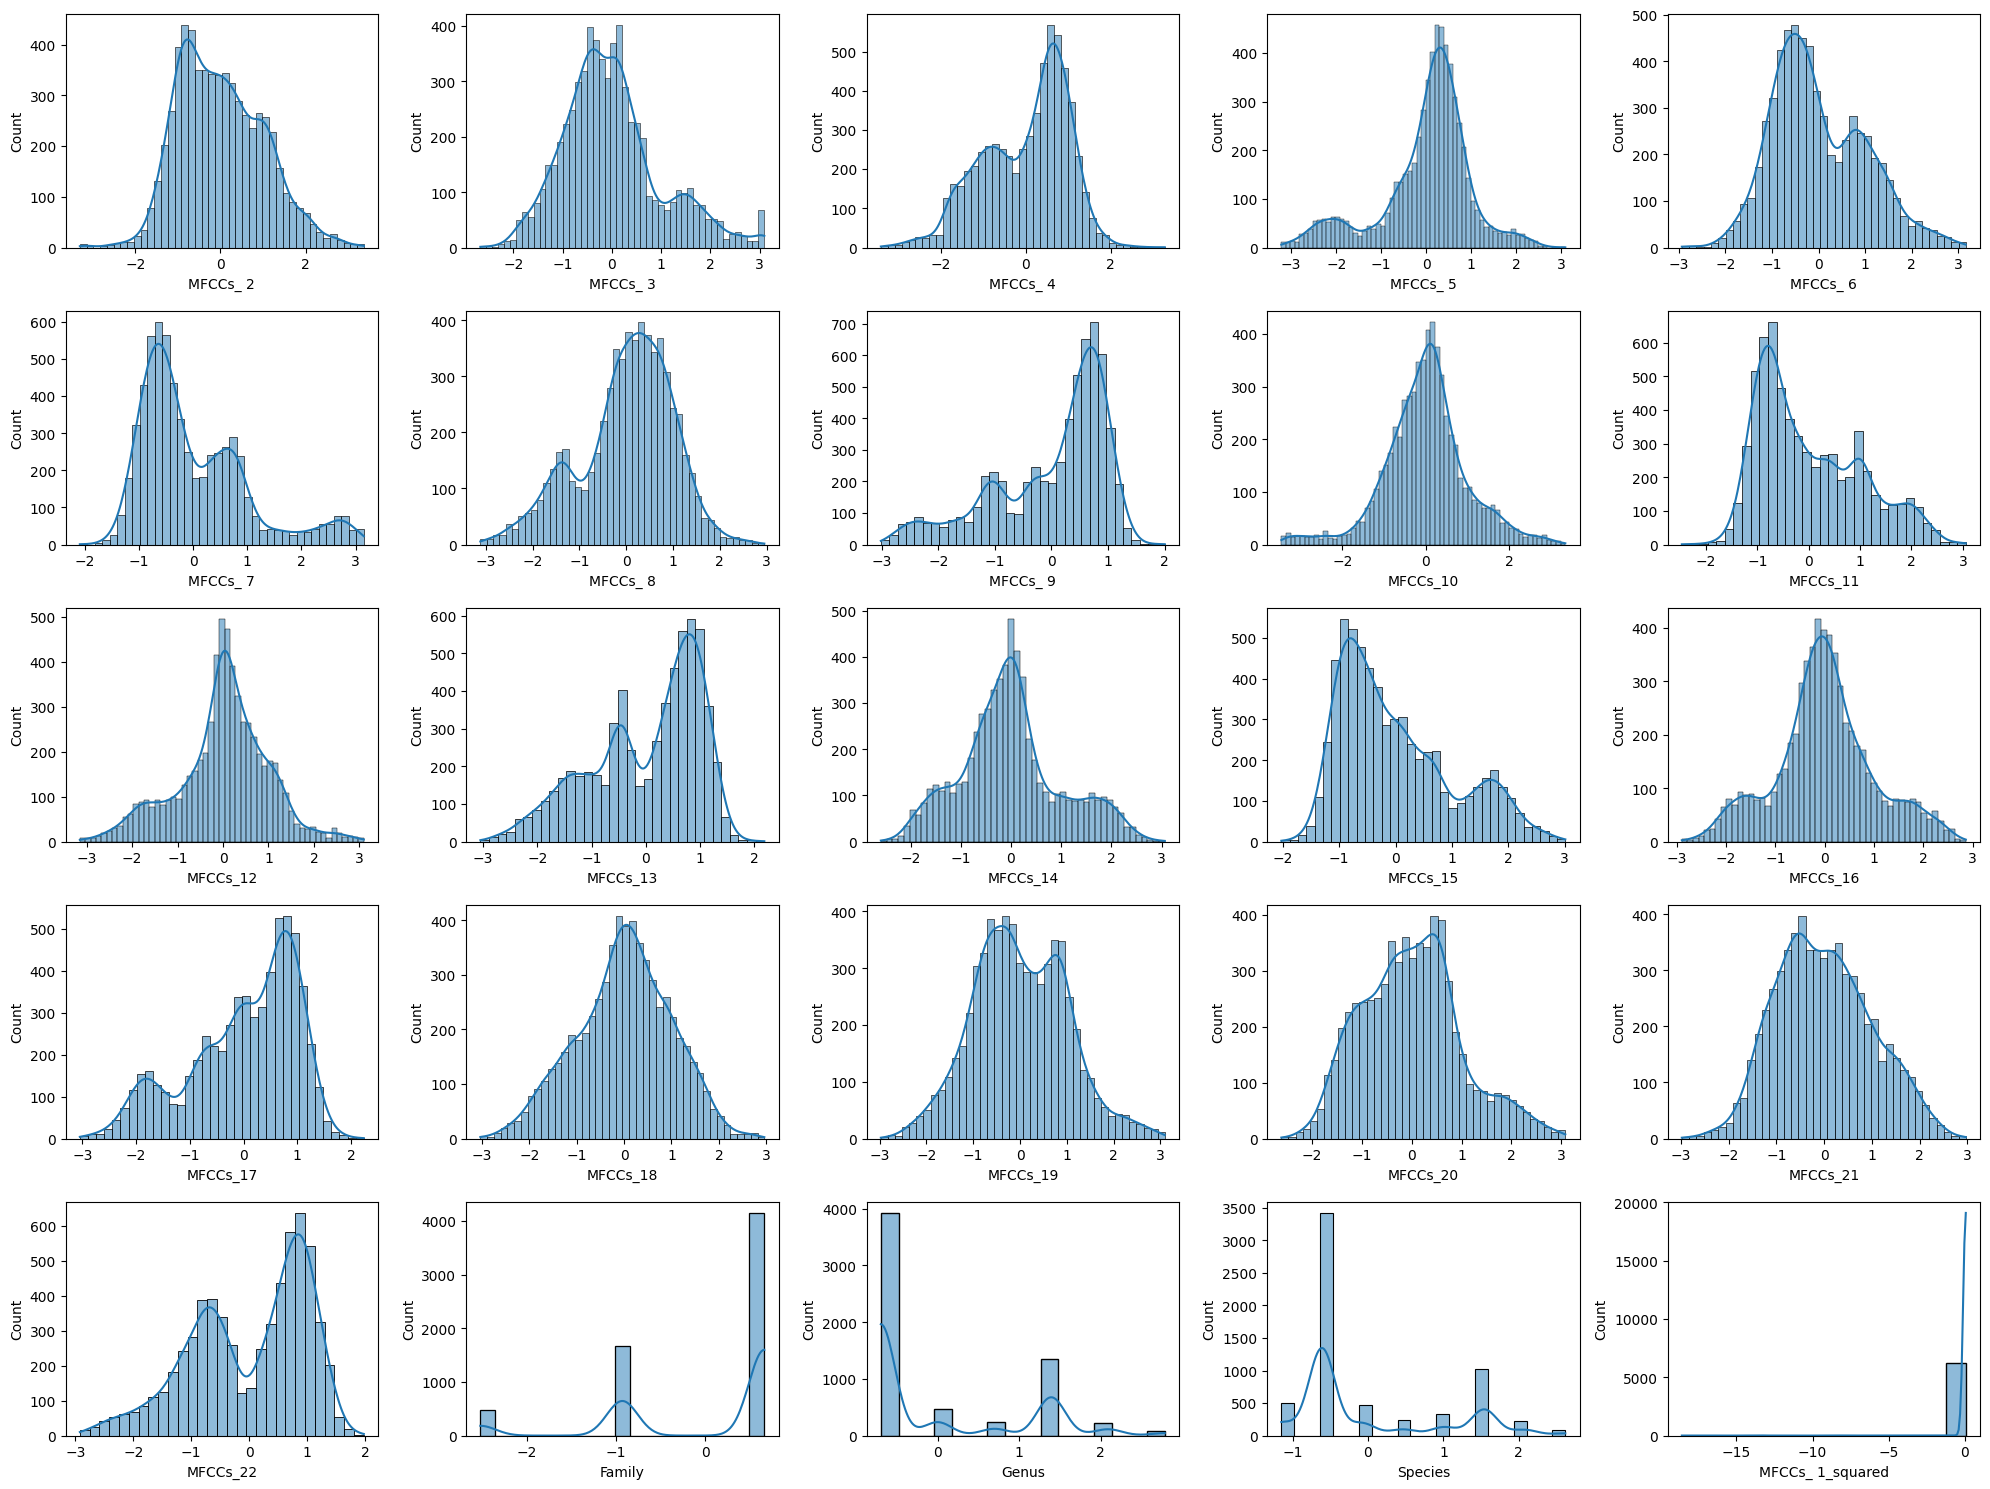

In [274]:
scaler = StandardScaler()
mfcc_scaled = scaler.fit_transform(mfcc_poly_df)
mfcc_scaled_df = pd.DataFrame(mfcc_scaled, columns=mfcc_poly_df.columns)

beautiful_plot(mfcc_scaled_df)

### 1.5. Feature Correlation Analysis
Investigate correlations between features and remove highly correlated features to avoid redundancy and improve clustering results.

#### Correlation Matrix
- The correlation matrix is a square matrix that shows the pairwise correlation coefficients for a set of variables, with values typically ranging from -1 to +1.
\begin{bmatrix}
1 & r_{XY} & r_{XZ} \\
r_{YX} & 1 & r_{YZ} \\
r_{ZX} & r_{ZY} & 1
\end{bmatrix}
- The most common measure of correlation is Pearson's correlation coefficient, calculated as:
$$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$
Where $\text{Cov}(X, Y)$ is the covariance between variables $X$ and $Y$, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$, respectively.
- A correlation coefficient close to +1 implies a strong positive correlation, meaning that as one variable increases, the other also tends to increase.
- A coefficient close to -1 indicates a strong negative correlation, suggesting that as one variable increases, the other tends to decrease.
- A coefficient around 0 suggests no linear correlation between the variables.


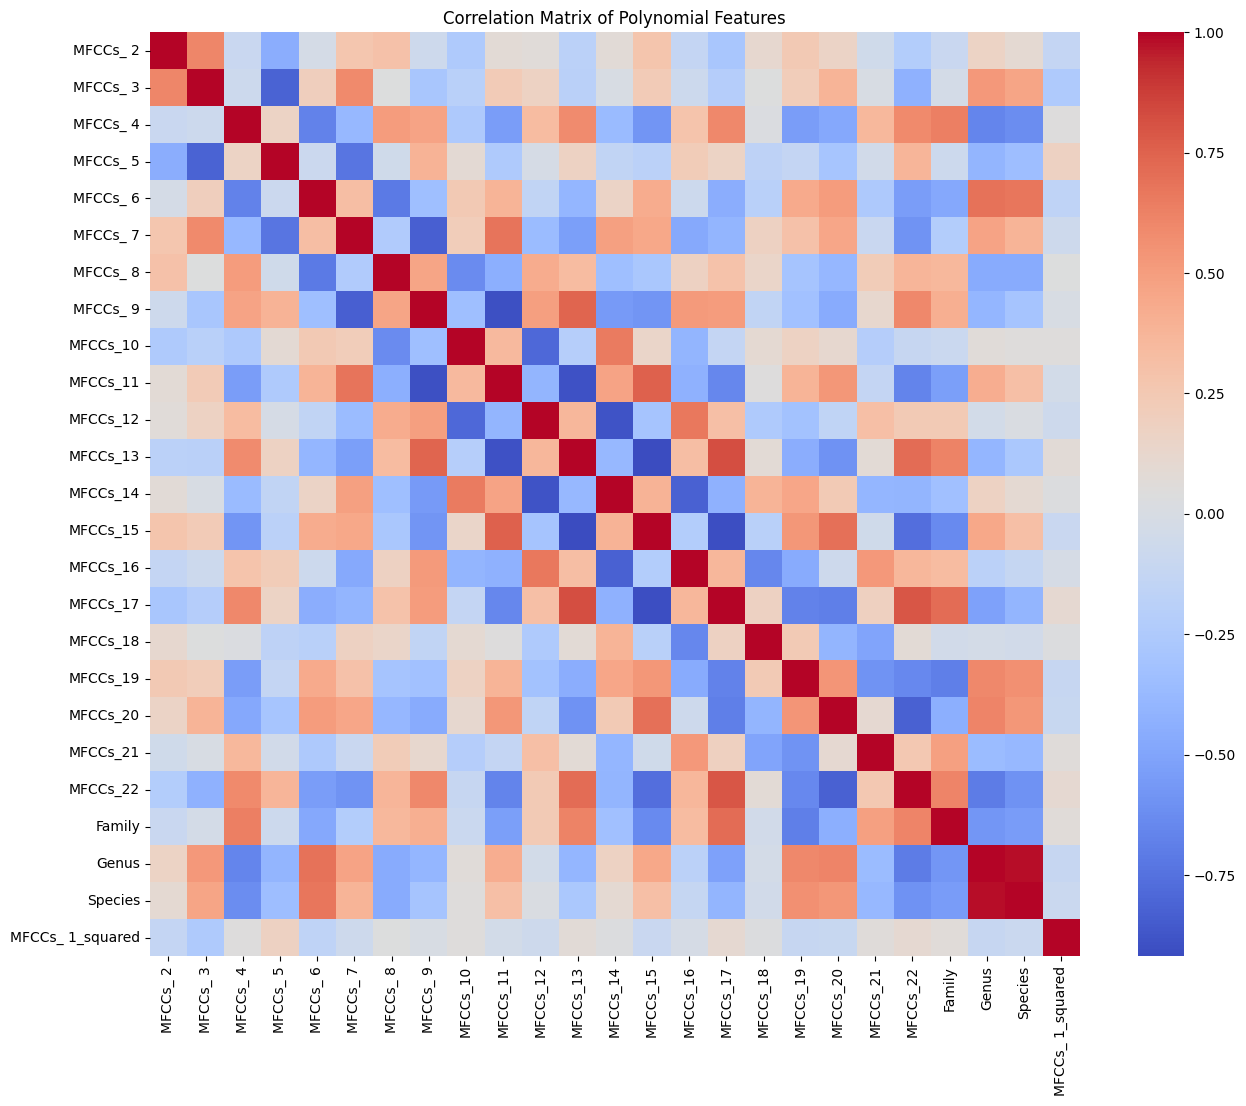

In [275]:
# Compute correlation matrix
correlation_matrix = mfcc_scaled_df.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix of Polynomial Features")
plt.show()

In [276]:
threshold = 0.8

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation above the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(f"Features to drop (correlation > {threshold}):\n", to_drop)

# Drop the identified features
mfcc_reduced_df = mfcc_scaled_df.drop(columns=to_drop)

mfcc_reduced_df.describe()

Features to drop (correlation > 0.8):
 ['MFCCs_17', 'Species']


,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,...,MFCCs_15,MFCCs_16,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,MFCCs_ 1_squared
count,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,...,6.295000e+03,6.295000e+03,6.295000e+03,6295.000000,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03,6.295000e+03
mean,-1.805986e-17,7.223945e-17,3.070177e-16,5.417959e-17,-3.611973e-17,3.611973e-17,-1.805986e-17,-3.611973e-17,9.029932e-18,7.223945e-17,...,-1.805986e-17,1.805986e-17,-3.611973e-17,0.000000,-3.611973e-17,9.029932e-18,-1.444789e-16,-1.805986e-16,-1.083592e-16,-3.354620e-15
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,...,1.000079e+00,1.000079e+00,1.000079e+00,1.000079,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-3.306659e+00,-2.669721e+00,-3.409704e+00,-3.219058e+00,-2.933392e+00,-2.091566e+00,-3.114650e+00,-3.016884e+00,-3.462496e+00,-2.468539e+00,...,-2.026756e+00,-2.897539e+00,-3.032963e+00,-2.972438,-2.610132e+00,-2.978409e+00,-2.921415e+00,-2.525583e+00,-7.002726e-01,-1.859222e+01
25%,-7.812852e-01,-6.531785e-01,-7.767260e-01,-3.714140e-01,-7.237649e-01,-7.236995e-01,-5.379829e-01,-6.295127e-01,-5.347132e-01,-8.050199e-01,...,-7.962894e-01,-5.220859e-01,-6.504146e-01,-0.699880,-7.410417e-01,-7.371388e-01,-7.651407e-01,-9.309447e-01,-7.002726e-01,8.058048e-02
50%,-1.057182e-01,-1.250686e-01,2.489443e-01,1.968979e-01,-1.959086e-01,-3.198880e-01,1.331035e-01,3.748236e-01,2.490556e-02,-2.755763e-01,...,-2.706160e-01,-2.761910e-02,3.522321e-02,-0.069794,-2.446194e-02,-6.797660e-02,2.712126e-01,6.636939e-01,-7.002726e-01,8.058048e-02
75%,7.151835e-01,4.767373e-01,7.622592e-01,5.666752e-01,7.387512e-01,5.697169e-01,7.061650e-01,7.515179e-01,5.009523e-01,7.588929e-01,...,6.094183e-01,5.326695e-01,6.866310e-01,0.734030,6.013895e-01,6.831620e-01,8.489785e-01,6.636939e-01,1.392897e+00,8.058048e-02
max,3.370204e+00,3.093050e+00,3.269959e+00,3.086814e+00,3.160973e+00,3.152600e+00,2.949323e+00,2.003311e+00,3.351776e+00,3.057324e+00,...,3.010254e+00,2.862533e+00,2.958324e+00,3.093142,3.078010e+00,2.964519e+00,1.975228e+00,6.636939e-01,2.788344e+00,8.058048e-02


## 2. K-Means Clustering

### 2.1 Elbow Method
The Elbow Method is a popular technique used in clustering to determine the optimal number of clusters (k) for a given dataset. It helps in selecting a suitable value of k by analyzing how the total within-cluster sum of squares (WCSS) changes as k increases.

1. Fit the Model: For a range of k values (e.g., from 1 to 10), apply the clustering algorithm (here, K-Means) to the dataset and compute the WCSS for each k.

2. Calculate WCSS: WCSS measures the variance within each cluster. It is calculated as the sum of the squared distances between each data point and the centroid of its assigned cluster. A lower WCSS indicates that the data points within each cluster are closer to the centroid.

3. Plot the Results: Create a plot with the number of clusters (k) on the x-axis and the corresponding WCSS on the y-axis.

4. Identify the Elbow Point: Look for the point in the plot where the rate of decrease in WCSS sharply changes, resembling an elbow. This point indicates a suitable balance between minimizing WCSS and avoiding overfitting by adding too many clusters.


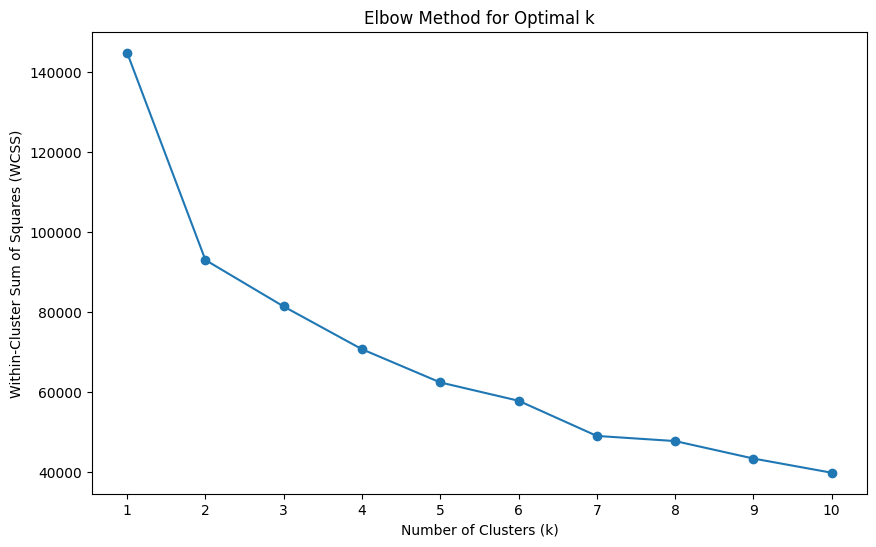

In [277]:
# Define a range of possible cluster numbers to test (e.g., 1 to 10)
k_range = range(1, 11)
wcss = []  # List to store the WCSS (Within-Cluster Sum of Squares) for each k

# Run KMeans for each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mfcc_reduced_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for KMeans

# Plot the WCSS values for each k
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_range)
plt.show()

### 2.2 Silhouette Score Evaluation

The Silhouette Score is a popular technique for evaluating the quality of clustering. This method provides insight into how well-separated and distinct the clusters are.

1. Calculation for a data point $i$:
  - $a(i)$: Calculate the average distance from point $i$ to all other points in the same cluster (intra-cluster distance).
  - $b(i)$: Calculate the average distance from point $i$ to all points in the nearest cluster (inter-cluster distance).
  - The Silhouette Score $s(i)$ for point $i$ is then calculated as:

$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

2. Aggregate Score
  - The overall Silhouette Score for the clustering solution is the average of the individual scores for all points in the dataset.

3. Interpretation:
  - A score close to 1 indicates that the sample is well-matched to its own cluster and poorly matched to neighboring clusters.
  - A score close to 0 indicates overlapping clusters.
  - A score close to -1 suggests that samples may be in the wrong clusters.


In [278]:
# Set the optimal number of clusters
optimal_k = 5  # Elbow Point

# Run K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(mfcc_reduced_df)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(mfcc_reduced_df, cluster_labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}")

Silhouette Score for 5 clusters: 0.4147


### 2.3 Cluster Implementation

In [279]:
# Add the cluster labels to a copy of the original DataFrame
mfcc_clustered_df = mfcc_reduced_df.copy()
mfcc_clustered_df['Cluster'] = cluster_labels

cluster_counts = mfcc_clustered_df['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)

Cluster counts:
 Cluster
0    3454
1    1650
4     512
3     344
2     335
Name: count, dtype: int64


### 2.4 Cluster Initialization
Compare different initialization methods for K-Means

In [280]:
# K-Means with Random Initialization
kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=42)
labels_random = kmeans_random.fit_predict(mfcc_reduced_df)
silhouette_random = silhouette_score(mfcc_reduced_df, labels_random)

# K-Means with K-Means++ Initialization
kmeans_kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels_kmeans_plus = kmeans_kmeans_plus.fit_predict(mfcc_reduced_df)
silhouette_kmeans_plus = silhouette_score(mfcc_reduced_df, labels_kmeans_plus)

# Output the Silhouette Scores
print(f"Silhouette Score with Random Initialization: {silhouette_random:.4f}")
print(f"Silhouette Score with K-Means++ Initialization: {silhouette_kmeans_plus:.4f}")


Silhouette Score with Random Initialization: 0.2912
Silhouette Score with K-Means++ Initialization: 0.4147


## 3. Cluster Visualization

### 3.1 Dimensionality Reduction
Apply PCA (Principal Component Analysis) to reduce the dimensions for visualization purposes.

In [281]:
pca = PCA(n_components=2)

# PCA for K-Means with Random Initialization
pca_result_random = pca.fit_transform(mfcc_reduced_df)
pca_df_random = pd.DataFrame(data=pca_result_random, columns=['PCA1', 'PCA2'])
pca_df_random['Cluster'] = labels_random  # Add cluster labels

# PCA for K-Means with K-Means++ Initialization
pca_result_kmeans_plus = pca.fit_transform(mfcc_reduced_df)
pca_df_kmeans_plus = pd.DataFrame(data=pca_result_kmeans_plus, columns=['PCA1', 'PCA2'])
pca_df_kmeans_plus['Cluster'] = labels_kmeans_plus  # Add cluster labels

### 3.2 Cluster Plots
Visualize the clusters using 2D scatter plots.

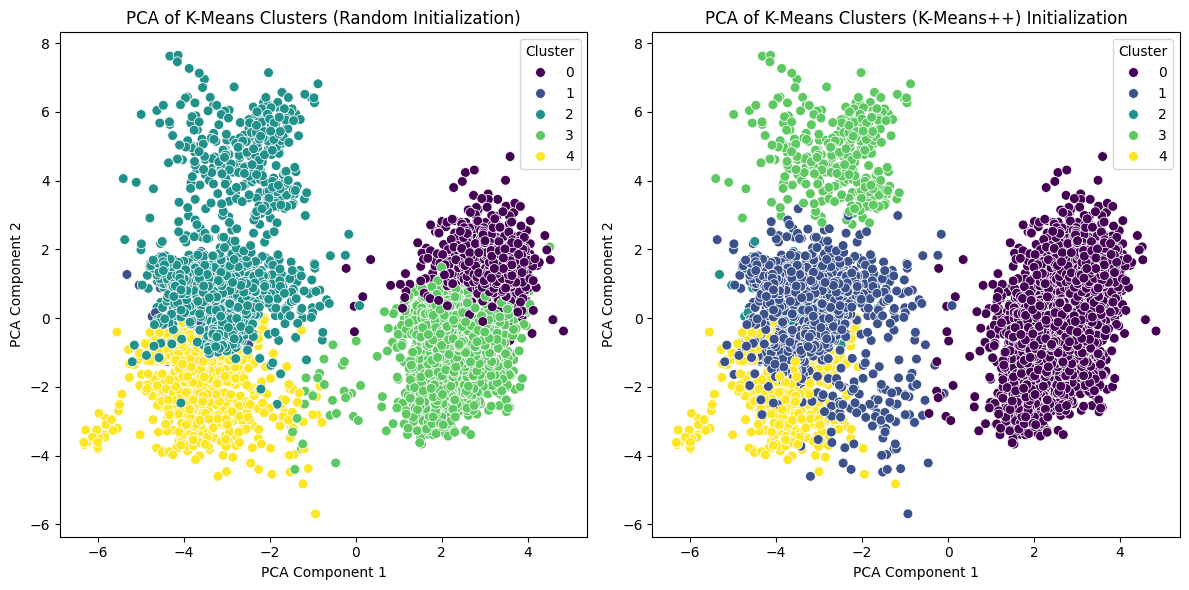

In [282]:
# Plot the PCA results for Random Initialization
plt.figure(figsize=(12, 6))

# Plot for Random Initialization
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df_random, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title("PCA of K-Means Clusters (Random Initialization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')

# Plot for K-Means++ Initialization
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df_kmeans_plus, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title("PCA of K-Means Clusters (K-Means++) Initialization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

### 3.3 Feature Contribution to Clustering

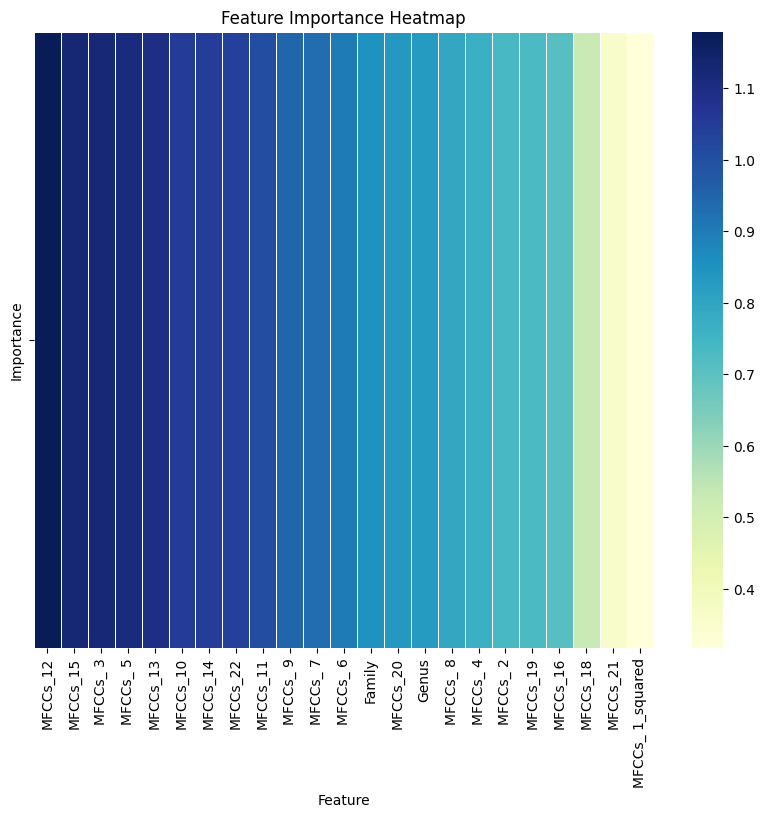


Top 10 Most Important Features:


,Feature,Importance
10,MFCCs_12,1.179132
13,MFCCs_15,1.127437
1,MFCCs_ 3,1.123596
3,MFCCs_ 5,1.114503
11,MFCCs_13,1.095265
8,MFCCs_10,1.048030
12,MFCCs_14,1.046022
19,MFCCs_22,1.039019
9,MFCCs_11,1.004366
7,MFCCs_ 9,0.949248


In [283]:
# Calculate the centroids of the clusters
centroids = kmeans_kmeans_plus.cluster_centers_

# Calculate the absolute mean difference of each feature across centroids
feature_importance = np.abs(centroids).mean(axis=0)

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': mfcc_reduced_df.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(feature_importance_df.set_index('Feature').T,
            cmap="YlGnBu",
            cbar=True,
            linewidths=.5)
plt.title("Feature Importance Heatmap")
plt.show()

print("\nTop 10 Most Important Features:")
feature_importance_df.head(10)

## 4. Cluster Evaluation Metrics

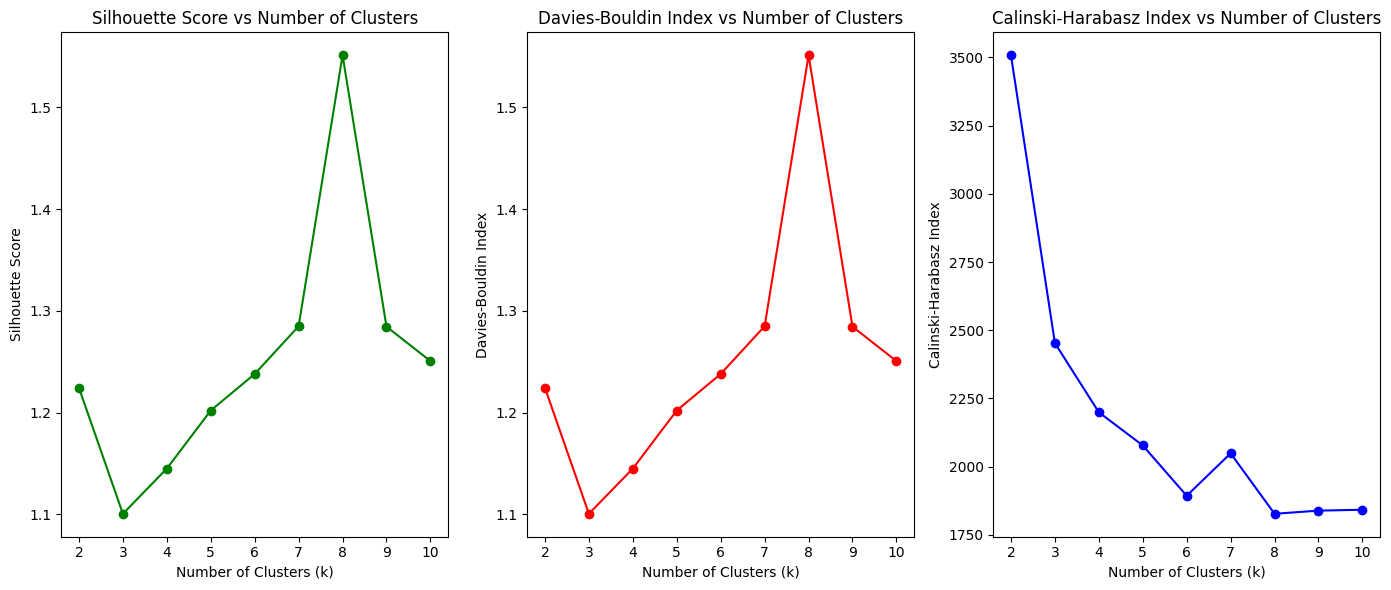

In [284]:
# Lists to store metrics for each k
db_scores = []
ch_scores = []
sh_scores = []

# Define a range of possible cluster numbers to test (e.g., 1 to 10)
k_range = range(2, 11)

for k in k_range:
    # Fit K-Means clustering
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(mfcc_reduced_df)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(mfcc_reduced_df, labels)
    db_scores.append(db_index)

    # Calculate Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(mfcc_reduced_df, labels)
    ch_scores.append(ch_index)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(mfcc_reduced_df, labels)
    sh_scores.append(silhouette_avg)

# Plotting the metrics
plt.figure(figsize=(14, 6))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_range, db_scores, marker='o', color='g')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)


# Davies-Bouldin Index
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o', color='r')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.xticks(k_range)

# Calinski-Harabasz Index
plt.subplot(1, 3, 3)
plt.plot(k_range, ch_scores, marker='o', color='b')
plt.title("Calinski-Harabasz Index vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Index")
plt.xticks(k_range)

plt.tight_layout()
plt.show()

## 5. Comparison with other Clustering Algorithms

### 5.1 Agglomerative Clustering

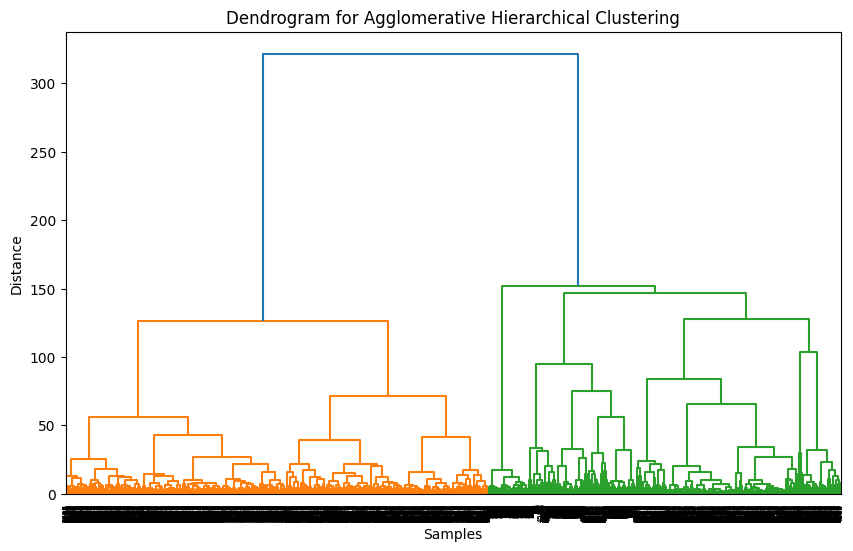

Silhouette Score for Agglomerative Hierarchical Clustering: 0.40


In [285]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)  # Use optimal_k from K-Means
agg_labels = agg_clustering.fit_predict(mfcc_reduced_df)

# Plotting Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(mfcc_reduced_df, method='ward'))
plt.title("Dendrogram for Agglomerative Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Evaluate Clustering
agg_silhouette = silhouette_score(mfcc_reduced_df, agg_labels)
print(f"Silhouette Score for Agglomerative Hierarchical Clustering: {agg_silhouette:.2f}")

### 5.2 DBSCAN

In [286]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(mfcc_reduced_df)

# Evaluate Clustering
dbscan_silhouette = silhouette_score(mfcc_reduced_df, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}")

Silhouette Score for DBSCAN: -0.12


### 5.3 Comparison of Cluster Results

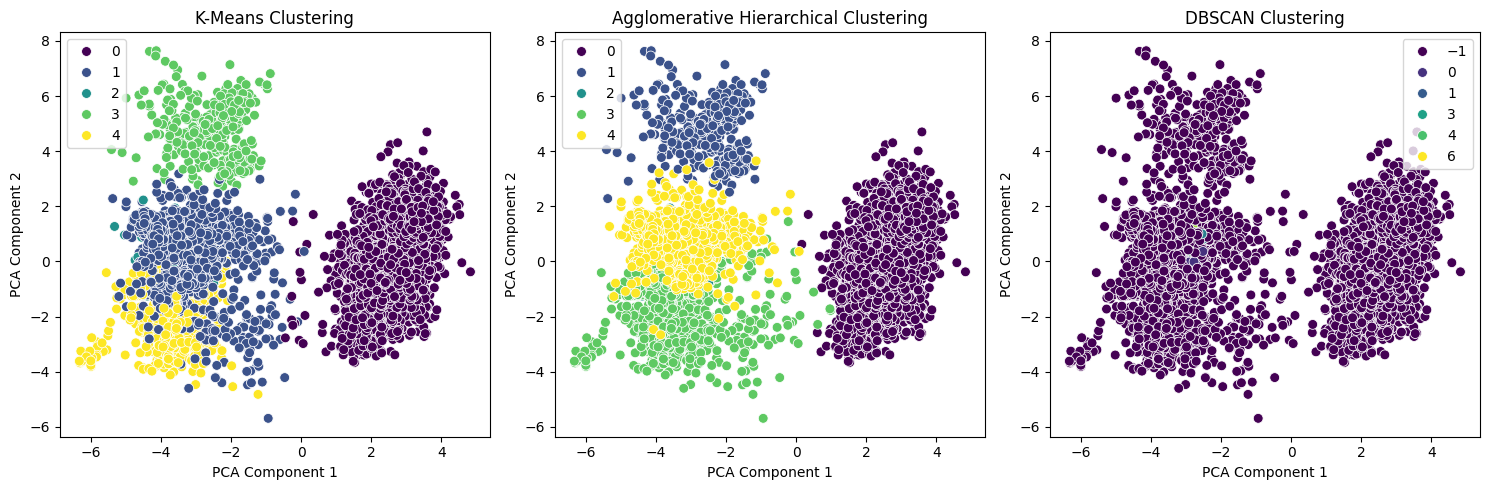

In [287]:
# Create a PCA for visualization (as before)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mfcc_reduced_df)

# Plot K-Means results
plt.figure(figsize=(15, 5))

# K-Means Clustering
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels_kmeans_plus, palette='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Agglomerative Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=agg_labels, palette='viridis', s=50)
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dbscan_labels, palette='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

#### Strengths and Weaknesses of Each Algorithm
1. K-Means
- Strengths:
    - Fast and efficient for large datasets.
    - Works well with spherical clusters.
    - Simple to understand and implement.
- Weaknesses:
    - Sensitive to initialization (although K-Means++ helps).
    - Requires the number of clusters to be specified beforehand.
    - Assumes clusters are of similar sizes and densities.

2. Agglomerative Hierarchical Clustering
- Strengths:
    - Does not require a predefined number of clusters (you can cut the dendrogram at the desired level).
    - Produces a hierarchy of clusters, which can provide insights into data structure.
    - Can capture clusters of different shapes and sizes.
- Weaknesses:
    - Computationally expensive for large datasets (complexity is O(n3)O(n3)).
    - Sensitive to noise and outliers.

3. DBSCAN
- Strengths:
    - Can find arbitrarily shaped clusters and is robust to noise.
    - Does not require specifying the number of clusters a priori.
- Weaknesses:
    - Requires careful tuning of parameters (epsilon and min_samples).
    - May struggle with clusters of varying densities.
    - Performance can degrade with high-dimensional data.

## 6. Analysis and Report